### 7.2.1 导入工具包

In [1]:
# 导入工具包，用于模型训练、交叉验证及模型融合
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler

In [2]:
# 加载数据
train_data_file = './zhengqi_train.txt'
test_data_file = './zhengqi_test.txt'
train_data = pd.read_csv(train_data_file, sep='\t')
test_data = pd.read_csv(test_data_file, sep='\t')
display(train_data.head())
display(test_data.head())

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  

[5 rows x 39 columns]

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  

[5 rows x 38 columns]

In [3]:
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

None

In [4]:
display(train_data.describe())
display(test_data.describe())

V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000   -12.891000  ...   
25%      -0.853000    -0.310000    -0.295000    -0.159000    -0.390000  ...   
50%      -0.466000     0.388000     0.344000     0.362000     0.042000  ...   
75%      -0.154000     0.831250     0.782250     0.726000     0.042000  ...   
max       0.489000     1.895000     1.918000     2.245000     1.335000  ...   

               V29          V30          V31          V32          V33  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.097648     0.055477     0.127791     0.020806     0.007801   
std       1.061200     0.901934     0.873028     0.902584     1.006995   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.283000    -0.170250    -0.407250    -0.499000   
50%      -0.023000     0.053500     0.299500     0.039000    -0.040000   
75%       0.745250     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.006715     0.197764     0.030658    -0.130330     0.126353  
std       1.003291     0.985675     0.970812     1.017196     0.983966  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.202500    -0.413000    -0.798250    -0.350250  
50%       0.160000     0.364000     0.137000    -0.185500     0.313000  
75%       0.273000     0.602000     0.644250     0.495250     0.793250  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172   
std       1.073333     1.076670     0.969541     1.034925     1.147286   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000   
75%       0.549000     0.589000     0.278000     0.793000     0.610000   
max       2.100000     2.120000     1.946000     2.603000     4.475000   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.838049    -0.274092    -0.173971    -0.266709     0.255114  ...   
std       0.963043     1.054119     1.040101     1.085916     1.014394  ...   
min      -1.168000    -5.649000    -5.625000    -6.059000    -6.784000  ...   
25%       0.122000    -0.732000    -0.509000    -0.775000    -0.390000  ...   
50%       0.437000    -0.082000     0.018000    -0.004000     0.401000  ...   
75%       1.928000     0.457000     0.515000     0.482000     0.904000  ...   
max       3.176000     1.528000     1.394000     2.408000     1.766000  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.206871    -0.146463    -0.083215    -0.191729    -0.030782   
std       1.064140     0.880593     1.126414     1.138454     1.130228   
min      -2.435000    -2.413000    -4.507000    -7.698000    -4.057000   
25%      -0.453000    -0.818000    -0.339000    -0.476000    -0.472000   
50%      -0.445000    -0.199000     0.010000     0.100000     0.155000   
75%      -0.434000     0.468000     0.447000     0.471000     0.627000   
max       4.656000     3.022000     3.139000     1.428000     2.299000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

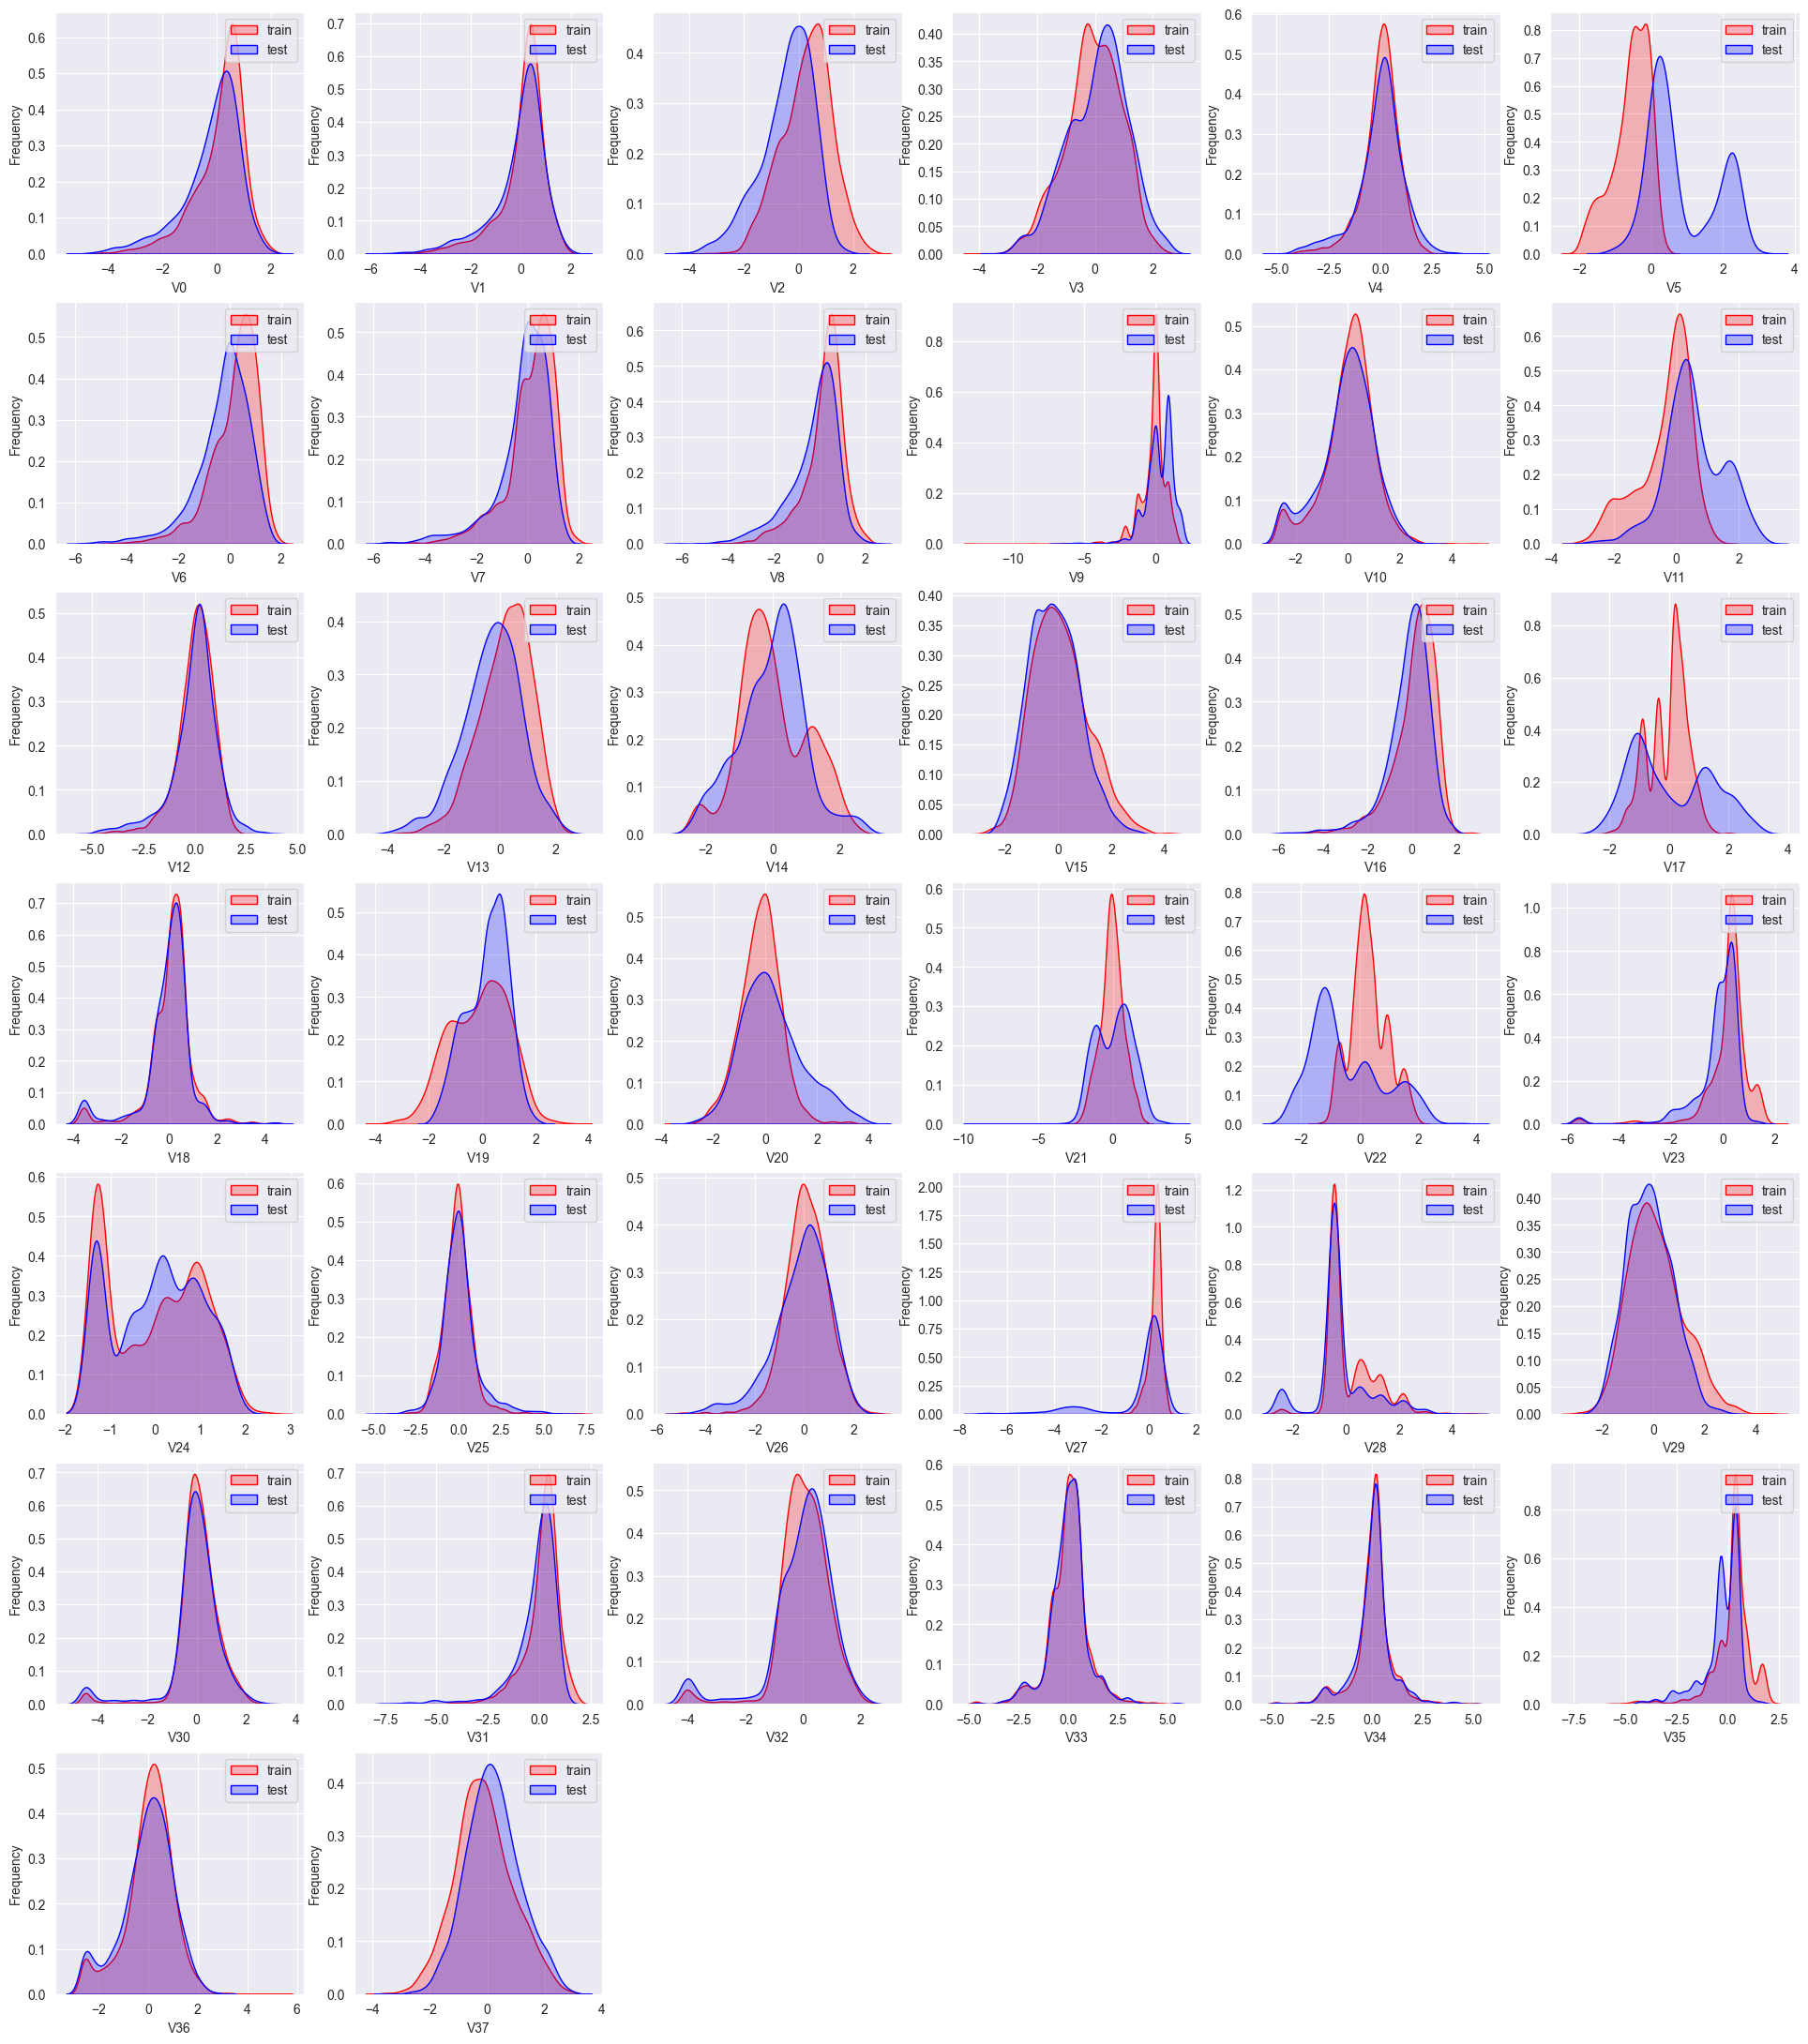

'\n从图中可以看出特征变量 V5，V9，V11，V17，V22，V28 在训练集与测试集中的分布不一致，这会导致模型的泛化能力变差，需要删除此类特征。\n'

In [5]:
# 筛选要删除的特征
"""
在训练集与测试集中的分布不一致的特征变量，会导致模型的泛化能力变差，需要删除此类特征。
利用 KDE 分布图来进行筛选，KDE（Kernel Density Estimation，核密度估计）可以理解为是对直方图的加窗平滑。通过绘制 KDE 分布图，可以查看并对比训练集和测试集中特征变量的分布情况，发现两个数据集中分布不一致的特征变量。
"""
## 单一特征变量 V0 在训练集和测试集中的分布情况，查看数据分布是否一致
# plt.figure(figsize=(8, 4), dpi=150)
# ax = sns.kdeplot(train_data['V0'], color='Red', fill=True)
# ax = sns.kdeplot(test_data['V0'], color='Blue', fill=True)
# ax.set_xlabel('V0')
# ax.set_ylabel('Frequency')
# ax = ax.legend(['train', 'test'])

## 对比所有变量在训练集和测试集中的 KDE 分布
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color='Red', fill=True)
    ax = sns.kdeplot(test_data[col], color='Blue', fill=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['train', 'test'])
    i += 1
plt.show()
"""
从图中可以看出特征变量 V5，V9，V11，V17，V22，V28 在训练集与测试集中的分布不一致，这会导致模型的泛化能力变差，需要删除此类特征。
"""

In [6]:
# 删除训练集和测试集分布不一致的特征变量
drop_columns = ['V5', 'V9', 'V11', 'V17', 'V22', 'V28']
train_data.drop(drop_columns, axis=1, inplace=True)
test_data.drop(drop_columns, axis=1, inplace=True)
display(train_data.head())
display(test_data.head())

V0     V1     V2     V3     V4     V6     V7     V8    V10    V12  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -1.812 -2.360 -0.436 -0.940 -0.073  ...   
1  0.968  0.437  0.066  0.566  0.194 -1.566 -2.360  0.332  0.188 -0.134  ...   
2  1.013  0.568  0.235  0.370  0.112 -1.367 -2.360  0.396  0.874 -0.072  ...   
3  0.733  0.368  0.283  0.165  0.599 -1.200 -2.086  0.403  0.011 -0.014  ...   
4  0.684  0.638  0.260  0.209  0.337 -1.073 -2.086  0.314 -0.251  0.199  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  

[5 rows x 33 columns]

V0     V1     V2     V3     V4     V6     V7     V8    V10    V12  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.550  0.551  0.244 -0.419  0.346  ...   
1  0.148  0.489 -0.247 -0.049  0.122  0.487  0.493 -0.127 -0.403  0.465  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.485  0.493 -0.227  0.330  0.173  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.474  0.504  0.010 -0.431 -0.038  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.408  0.497  0.155 -0.162 -0.063  ...   

     V27    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0  0.208  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1  0.226  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2  0.084 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3  0.203 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4  0.227 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  

[5 rows x 32 columns]

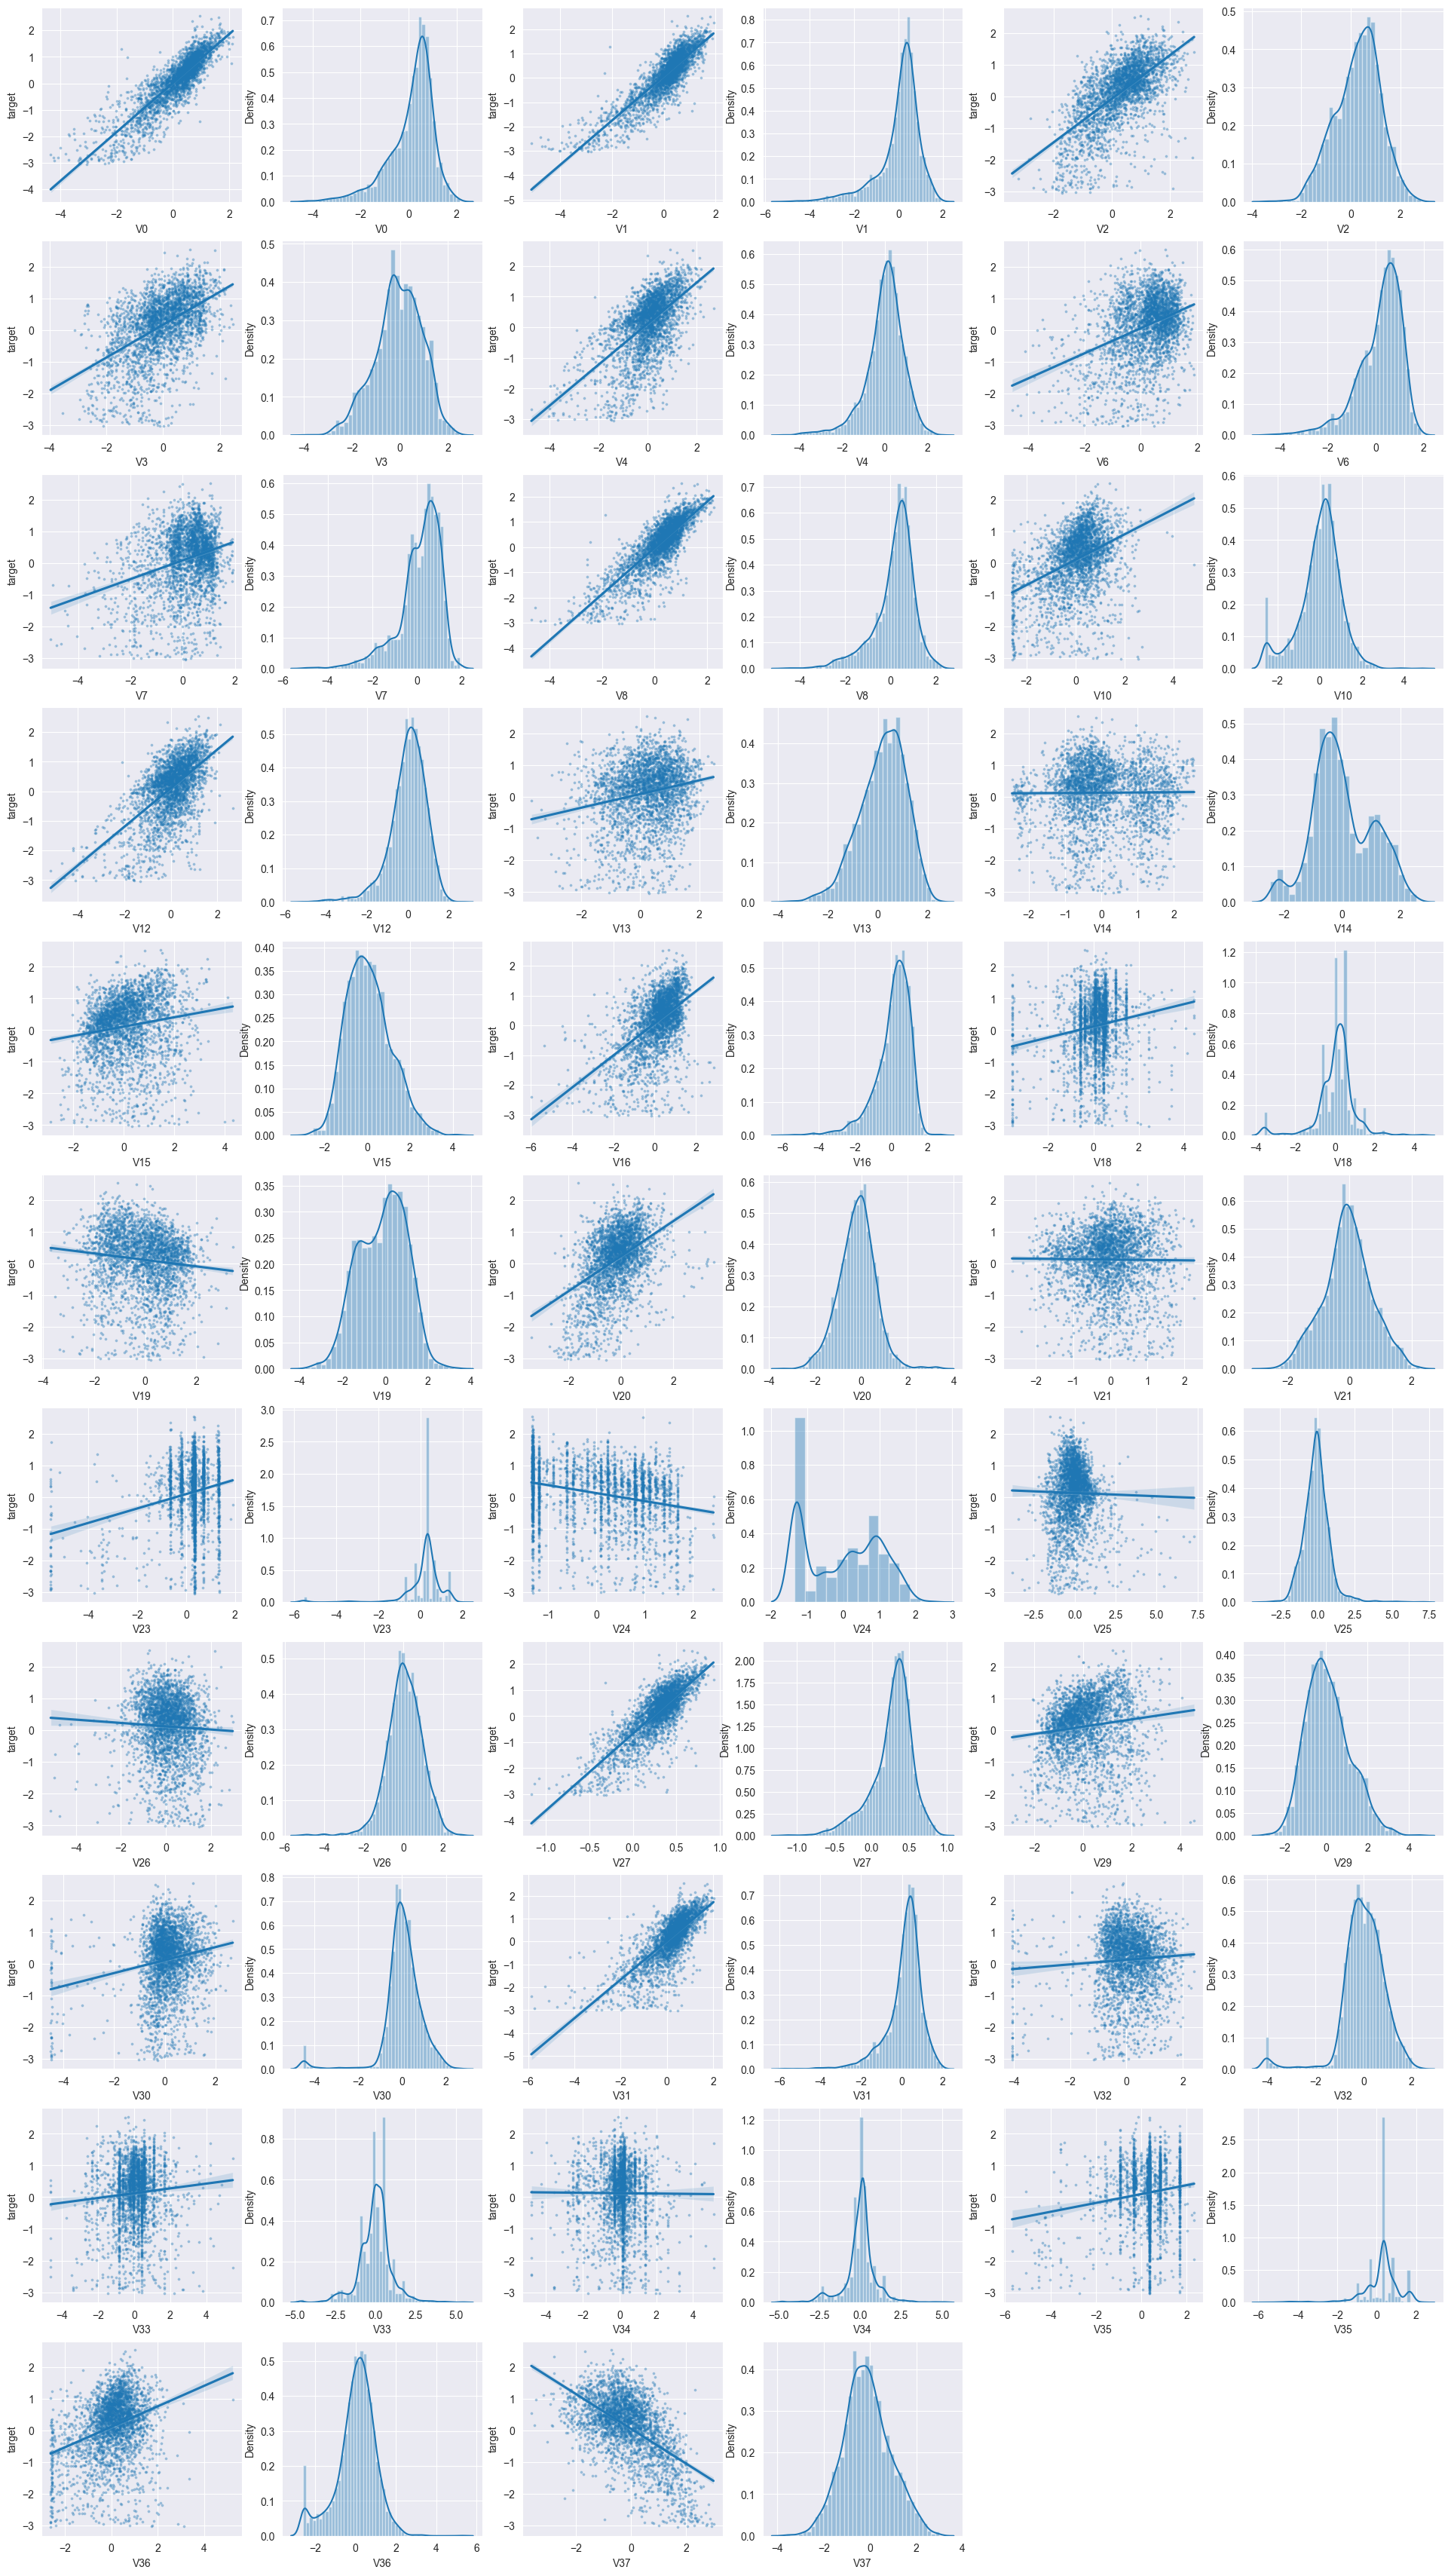

In [7]:
# 画图探索特征和标签的关系

# # 单变量 V0 与 target 的线性回归关系图
# fcols = 2
# frows = 1
# plt.figure(figsize=(8, 4), dpi=150)
#
# ax = plt.subplot(1, 2, 1)
# sns.regplot(x='V0', y='target', data=train_data, ax=ax, scatter_kws={'marker': '.', 's': 3, 'alpha': 0.3}, line_kws={'color': 'k'})
# plt.xlabel('V0')
# plt.ylabel('target')
#
# ax = plt.subplot(1, 2, 2)
# sns.distplot(train_data['V0'].dropna())
# plt.xlabel('V0')
#
# plt.show()

# 所有特征变量与 target 变量的线性回归关系图
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(4 * fcols, 4 * frows))

i = 0
for col in test_data.columns:
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, scatter_kws={'marker': '.', 's': 3, 'alpha': 0.3})
    plt.xlabel(col)
    plt.ylabel('target')

    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

plt.show()

In [8]:
# 查看特征变量的相关性
"""
删除了训练集和测试集中分布不一致的特征变量，如 V5，V9，V11，V17，V22，V28 之后，计算剩余特征变量及 target 变量的相关性系数。
此处只查看训练集的相关性系数即可。
"""
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
train_corr = train_data.corr(method="spearman")
train_corr

V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.894256  0.517319  0.399921  0.696039  ... -0.027432   
V1      0.894256  1.000000  0.490908  0.362483  0.650196  ... -0.047713   
V2      0.517319  0.490908  1.000000  0.416179  0.061375  ... -0.045764   
V3      0.399921  0.362483  0.416179  1.000000  0.294158  ... -0.052927   
V4      0.696039  0.650196  0.061375  0.294158  1.000000  ...  0.031054   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.027432 -0.047713 -0.045764 -0.052927  0.031054  ...  1.000000   
V35     0.039567  0.034086 -0.051460 -0.015650  0.102553  ...  0.240330   
V36     0.214309  0.192307  0.259177  0.299315  0.098678  ... -0.019966   
V37    -0.473005 -0.398149 -0.732023 -0.218281  0.041314  ... -0.000257   
target  0.866709  0.832457  0.630160  0.501114  0.574775  ... -0.001032   

             V35       V36       V37    target  
V0      0.039567  0.214309 -0.473005  0.866709  
V1      0.034086  0.192307 -0.398149  0.832457  
V2     -0.051460  0.259177 -0.732023  0.630160  
V3     -0.015650  0.299315 -0.218281  0.501114  
V4      0.102553  0.098678  0.041314  0.574775  
...          ...       ...       ...       ...  
V34     0.240330 -0.019966 -0.000257 -0.001032  
V35     1.000000 -0.061298  0.032619  0.033038  
V36    -0.061298  1.000000 -0.021399  0.287696  
V37     0.032619 -0.021399  1.000000 -0.497162  
target  0.033038  0.287696 -0.497162  1.000000  

[33 rows x 33 columns]

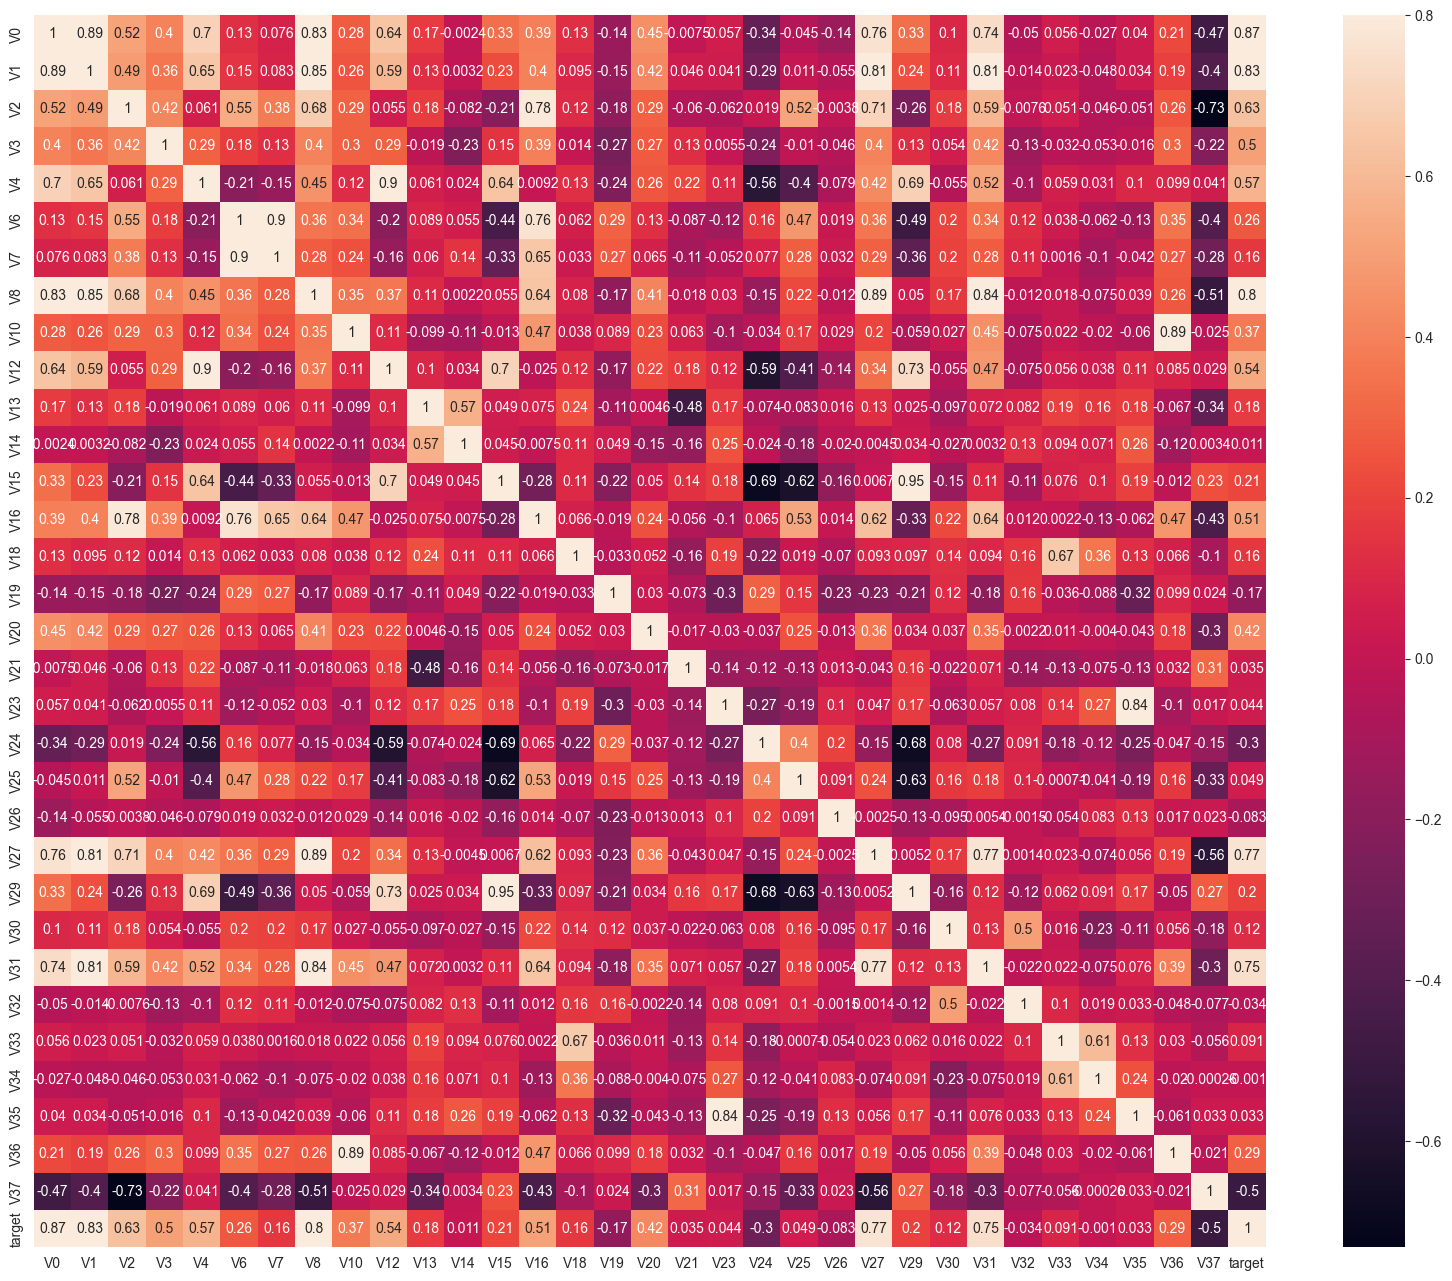

In [9]:
# 画出相关性热力图
"""
结果为所有特征变量和 target 变量之间的相关性系数，由此可以看出各个特征变量（V0~V37）之间的相关性以及它们与 target 变量的相关性。
可以发现图中对角线的数值是一样的，这是因为 V0 和 V1 的相关性和 V1 与 V0 的相关性是一样的，对角线就是指自身的相关性，故相关性为1.
"""
ax = plt.subplots(figsize=(20, 16))  # 调整画布大小
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)  # 画热力图

In [10]:
# 用相关系数阈值移除相关特征
threshold = 0.1

# 相关系数矩阵
corr_matrix = train_data.corr().abs()
drop_col = corr_matrix[corr_matrix['target'] < threshold].index
print(drop_col)
train_data.drop(drop_col, axis=1, inplace=True)  # 暂时先不删除这些特征，后续分析还会用到
train_data

Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')


V0     V1     V2     V3     V4  ...    V31    V35    V36    V37  \
0     0.566  0.016 -0.143  0.407  0.452  ... -0.615 -5.101 -2.608 -3.508   
1     0.968  0.437  0.066  0.566  0.194  ...  0.032  0.364 -0.335 -0.730   
2     1.013  0.568  0.235  0.370  0.112  ...  0.277  0.364  0.765 -0.589   
3     0.733  0.368  0.283  0.165  0.599  ...  0.279  0.364  0.333 -0.112   
4     0.684  0.638  0.260  0.209  0.337  ...  0.328  0.364 -0.280 -0.028   
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...   
2883  0.190 -0.025 -0.138  0.161  0.600  ...  0.809 -0.349  0.576  0.686   
2884  0.507  0.557  0.296  0.183  0.530  ...  0.465 -0.349 -0.615 -0.380   
2885 -0.394 -0.721 -0.485  0.084  0.136  ...  0.268 -0.349  0.951  0.748   
2886 -0.219 -0.282 -0.344 -0.049  0.449  ... -0.051 -0.230 -0.301  0.555   
2887  0.368  0.380 -0.225 -0.049  0.379  ... -0.042 -0.190 -0.567  0.388   

      target  
0      0.175  
1      0.676  
2      0.633  
3      0.206  
4      0.384  
...      ...  
2883   0.235  
2884   1.042  
2885   0.005  
2886   0.350  
2887   0.417  

[2888 rows x 26 columns]

In [11]:
test_data.drop(drop_col, axis=1, inplace=True)  # 暂时先不删除这些特征，后续分析还会用到
test_data

V0     V1     V2     V3     V4  ...    V30    V31    V35    V36  \
0     0.368  0.380 -0.225 -0.049  0.379  ...  0.057 -0.042 -0.190 -0.567   
1     0.148  0.489 -0.247 -0.049  0.122  ...  0.560  0.176  0.008 -0.294   
2    -0.166 -0.062 -0.311  0.046 -0.055  ...  0.101  0.199  0.008  0.373   
3     0.102  0.294 -0.259  0.051 -0.183  ...  1.007  0.137  0.008 -0.666   
4     0.300  0.428  0.208  0.051 -0.033  ...  0.291  0.370  0.008 -0.140   
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...   
1920 -1.362 -1.553 -3.096 -0.444  0.381  ... -4.488 -5.793 -2.131 -2.564   
1921 -2.698 -3.452 -3.620 -1.066 -1.385  ... -0.613 -7.698 -2.131 -2.564   
1922 -2.615 -3.564 -3.402 -0.422 -1.272  ...  0.125 -6.111 -1.537 -2.544   
1923 -2.661 -3.646 -3.271 -0.699 -1.270  ...  1.086 -5.268 -1.537 -2.549   
1924 -2.321 -3.037 -3.214 -1.594 -0.910  ... -0.774 -5.211 -1.537 -1.123   

        V37  
0     0.388  
1     0.104  
2     0.569  
3     0.391  
4    -0.497  
...     ...  
1920  0.597  
1921  1.215  
1922  1.612  
1923  1.431  
1924  1.988  

[1925 rows x 25 columns]

In [12]:
# 数据归一化
"""
这里是分别对训练数据和测试数据进行的归一化。
也可以分开对训练数据和测试数据进行归一化处理，不过这种方式需要建立在训练数据和测试数据分布一致的前提下，建议在数据量大的情况下使用（数据量大，一般分布比较一致），能加快归一化的速度。而数据量较小会存在分布差异较大的情况，此时，在数据分析和线下建模中应该将数据统一归一化。
"""
# 训练数据和测试数据分开归一化
cols_numeric = list(test_data.columns)

def scale_minmax(col):
    """每一列数据归一化"""
    return (col - col.min()) / (col.max() - col.min())

train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax, axis=0)
test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax, axis=0)
print(train_data_process[cols_numeric].describe())

                V0           V1           V2           V3           V4  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean      0.690528     0.735521     0.593745     0.606301     0.639876  ...   
std       0.143747     0.133738     0.145844     0.151302     0.119550  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.625465     0.695419     0.497279     0.515165     0.586328  ...   
50%       0.727076     0.766264     0.609155     0.609933     0.652940  ...   
75%       0.783922     0.812642     0.694342     0.714174     0.712185  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V30          V31          V35          V36          V37  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.634030     0.760517     0.734850     0.336306     0.527854  
std       0.125338     0.110903     0.122917     0.123733     0.15342

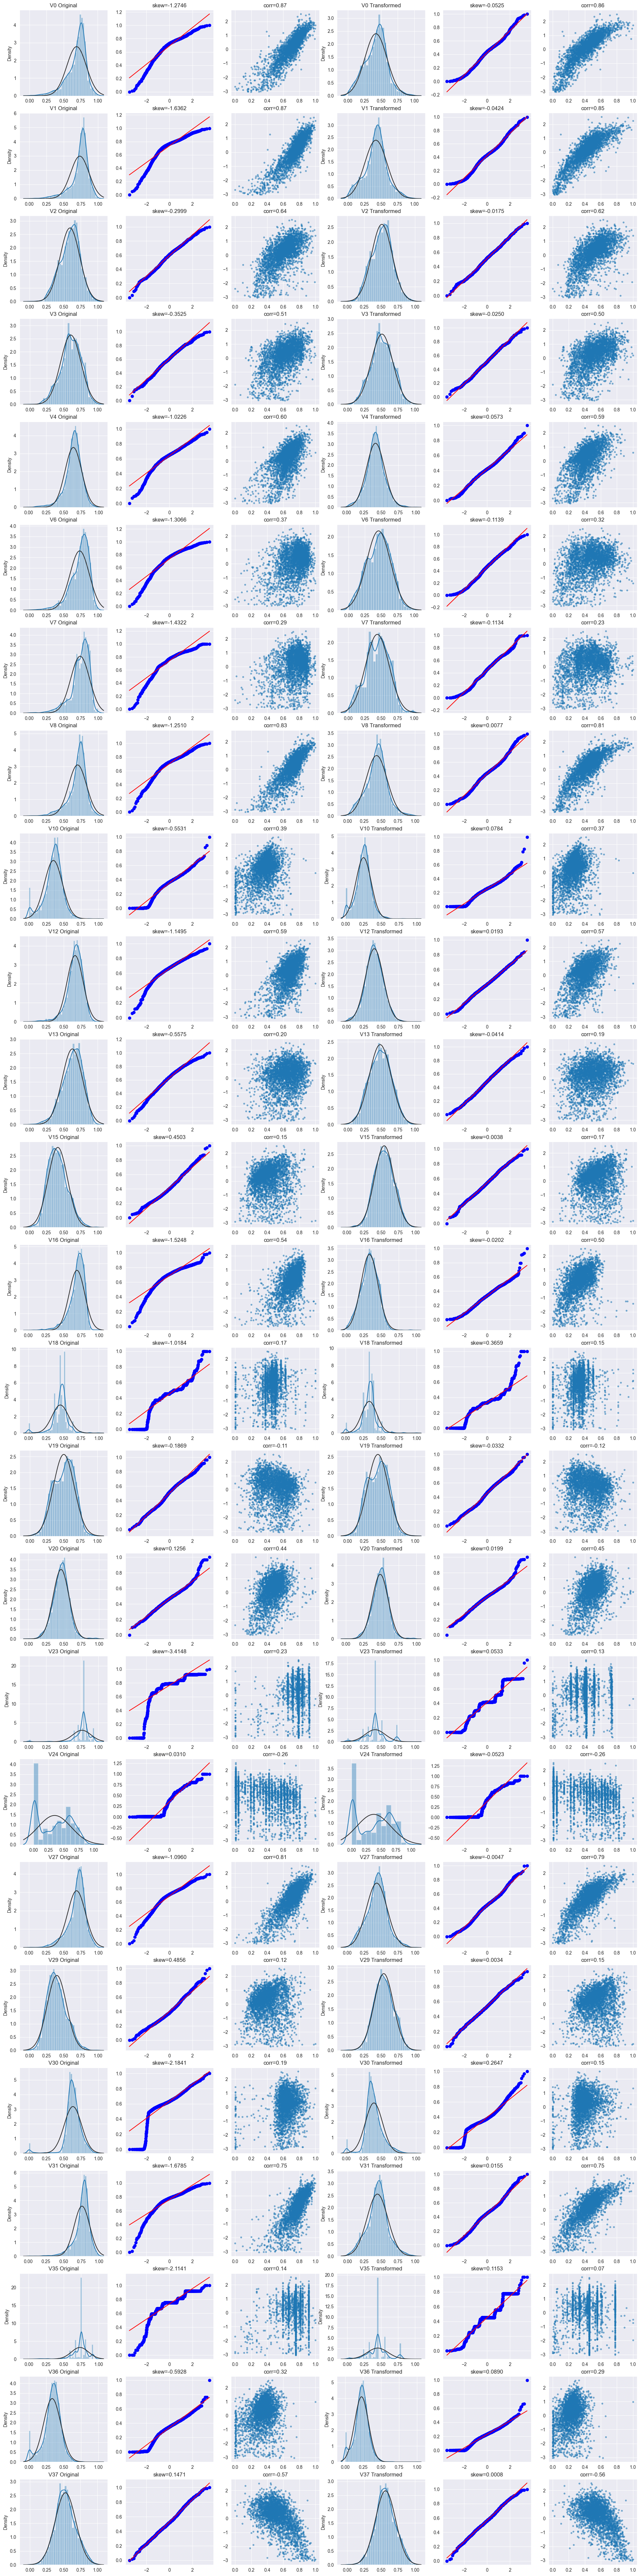

In [13]:
# 特征工程

# Box-Cox变换即将数据转换为满足正态分布的数据
# 绘图显示 Box-Cox 变换对数据分布的影响，Box-Cox 用于连续的响应变量不满足正态分布的情况。在进行 Box-Cox 变换之后，可以一定程度上减小不可观测的误差和预测变量的相关性
train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric)

plt.figure(figsize=(4 * fcols, 4 * frows))
i = 0

for var in cols_numeric:
    dat = train_data_process[[var, 'target']].dropna()

    i += 1
    plt.subplot(frows, fcols, i)
    sns.distplot(dat[var], fit=stats.norm)
    plt.title(var + ' Original')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)
    plt.title('corr=' + '{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))

    i += 1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var, fit=stats.norm)
    plt.title(var + ' Transformed')
    plt.xlabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')

    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)
    plt.title('corr=' + '{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))

In [14]:
# TODO target 也进行 Box-Cox 变换看看是不是会趋向于正态性

count    2888.000000
mean        0.126353
std         0.983966
min        -3.044000
25%        -0.350250
50%         0.313000
75%         0.793250
max         2.538000
Name: target, dtype: float64


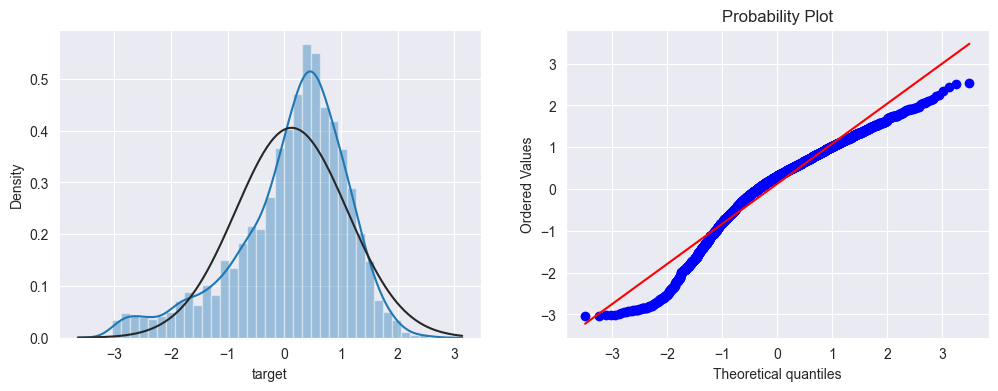

In [15]:
# 进行 Box-Cox 变换
cols_transform = test_data.columns
for col in cols_transform:
    # transform column
    train_data_process.loc[:, col], _ = stats.boxcox(train_data_process.loc[:, col] + 1)  # +1 是为了让归一化后的值为正，Box-Cox要求非负
    test_data_process.loc[:, col], _ = stats.boxcox(test_data_process.loc[:, col] + 1)
print(train_data_process['target'].describe())
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_data_process.target.dropna(), fit=stats.norm)
plt.subplot(1, 2, 2)
_ = stats.probplot(train_data_process.target.dropna(), plot=plt)

count    2888.000000
mean        1.129957
std         0.394110
min         0.291057
25%         0.867609
50%         1.135315
75%         1.379382
max         2.798463
Name: target, dtype: float64


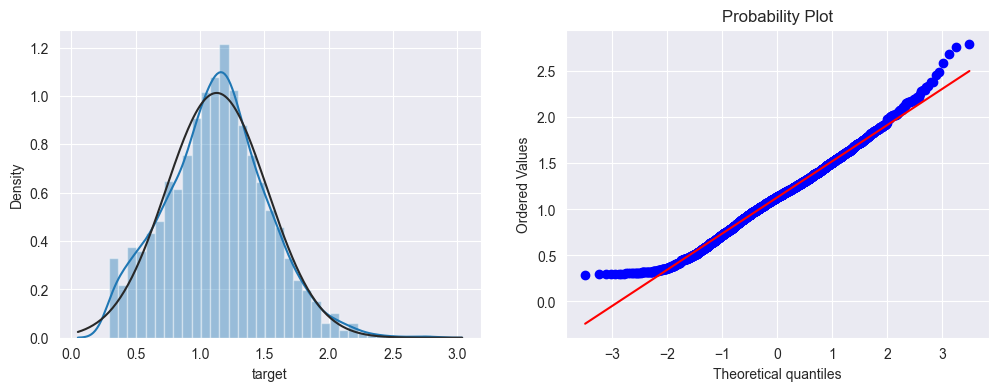

In [16]:
# 使用对数变换target目标值提升特征数据的正态性
sp = train_data.target
train_data.target1 = np.power(1.5, sp)  # 1.5^sp
print(train_data.target1.describe())

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_data.target1.dropna(), fit=stats.norm)
plt.subplot(1, 2, 2)
_ = stats.probplot(train_data.target1.dropna(), plot=plt)

### 7.2.2 获取训练数据和测试数据

In [17]:
# 使用简单交叉验证方法对模型进行验证，划分为训练数据70%，验证数据30%
# 获取训练集和验证集
# train_target = train_data_process['target']
train_target = train_data_process.target
train_data = train_data_process.drop('target', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.3, random_state=100)

### 7.2.3 模型评价函数

In [18]:
# 将 RMSE 和 MSE 作为模型性能的评价指标
# metric for evaluation
def rmse(y_true, y_pred):
    """均方根误差"""
    diff = y_pred - y_true
    sum_sq = sum(diff ** 2)
    n = len(y_pred)

    return np.sqrt(sum_sq / n)

def mse(y_true, y_pred):
    """均方误差"""
    return mean_squared_error(y_true, y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# 输入的 score_func 为记分函数时，该值为 True（默认值），输入函数为损失函数时，该值为 False
mse_scorer = make_scorer(mse, greater_is_better=False)

R2= 0.8732925229610079
rmse= 0.35375421636021054
mse= 0.1251420455926268
---------------------------------------
mean of residuals: -1.1052789339662617e-16
std of residuals: 0.35384176845073834
---------------------------------------
22 outliers:
[2655, 2159, 1164, 2863, 1145, 2697, 2528, 1882, 2645, 691, 1085, 1874, 2647, 884, 2696, 2668, 1310, 1458, 2769, 2002, 2669, 1972]


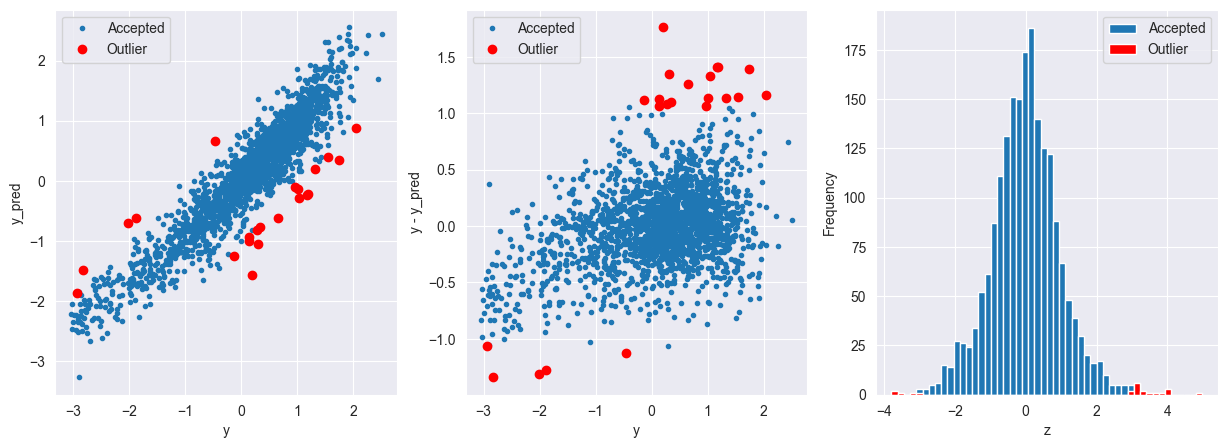

In [19]:
# 寻找离群值，并删除
def find_outliers(model, X, y, sigma=3):
    # predict y values using model
    model.fit(X, y)
    y_pred = pd.Series(model.predict(X), index=y.index)

    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index

    # print and plot the results
    print('R2=', model.score(X, y))
    print('rmse=', rmse(y, y_pred))
    print("mse=", mean_squared_error(y, y_pred))
    print('---------------------------------------')

    print('mean of residuals:', mean_resid)
    print('std of residuals:', std_resid)
    print('---------------------------------------')

    print(len(outliers), 'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y, y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')

    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y - y_pred, '.')
    plt.plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred')

    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins=50, ax=ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('z')

    return outliers

# find and remove outliers using a Ridge model
train_outliers = find_outliers(Ridge(), X_train, y_train)
X_t = X_train.drop(train_outliers)  # 只对训练数据丢弃了离群点
y_t = y_train.drop(train_outliers)

### 7.2.4 采用网格搜索训练模型

In [20]:
# 使用网格搜索训练模型
def get_training_data_omioutliers():
    # 获取训练数据省略异常值
    y = y_t.copy()
    X = X_t.copy()

    return X, y

def train_model(model, param_grid=[], X=[], y=[], splits=5, repeats=5):
    # 获取数据
    if len(y) == 0:
        X, y = get_training_data_omioutliers()
        # poly_trans = PolynomialFeatures(degree=2)
        # X = poly_trains.fit_transform(X)
        # X = MinMaxScaler().fit_transform(X)

    # 交叉验证
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)

    # 网格搜索最佳参数
    if len(param_grid) > 0:
        gsearch = GridSearchCV(model,
                               param_grid,
                               cv=rkfold,
                               scoring="neg_mean_squared_error",
                               verbose=1,
                               return_train_score=True)

        # 训练
        gsearch.fit(X, y)

        # 最好的模型
        model = gsearch.best_estimator_
        best_idx = gsearch.best_index_

        # 获取交叉验证评价指标
        grid_results = pd.DataFrame(gsearch.cv_results_)
        cv_mean = abs(grid_results.loc[best_idx, 'mean_test_score'])
        cv_std = grid_results.loc[best_idx, 'std_test_score']

    # 没有网格搜索
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)

    # 合并数据
    cv_score = pd.Series({'mean': cv_mean, 'std': cv_std})

    # 预测
    y_pred = model.predict(X)

    # 模型性能的统计数据
    print('-' * 30)
    print(model)
    print('-' * 30)
    print('score=', model.score(X, y))
    print('rmse=', rmse(y, y_pred))
    print('mse=', mse(y, y_pred))
    print('cross_val: mean=', cv_mean, ', std=', cv_std)

    # 残差分析与可视化
    y_pred = pd.Series(y_pred, index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid) / std_resid
    n_outliers = sum(abs(z) > 3)

    plt.figure(figsize=(15, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y, y_pred, '.')
    plt.xlabel('y')
    plt.ylabel('y_pred')
    plt.title('corr = {:.3f}'.format(np.corrcoef(y, y_pred)[0][1]))

    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y - y_pred, '.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred')
    plt.title('std resid = {:.3f}'.format(std_resid))

    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins=50, ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results


# 定义训练变量存储数据
opt_models = dict()
score_models = pd.DataFrame(columns=['mean', 'std'])
# no. k-fold splits
splits = 5
# no. k-fold iterations
repeats = 5

### 7.2.5 单一模型预测效果
#### 1. 岭回归

Fitting 25 folds for each of 23 candidates, totalling 575 fits
------------------------------
Ridge(alpha=0.25)
------------------------------
score= 0.8891324051426777
rmse= 0.32922271401128467
mse= 0.10838759542095626
cross_val: mean= 0.112581322001572 , std= 0.007603638311107319


Text(0, 0.5, 'score')

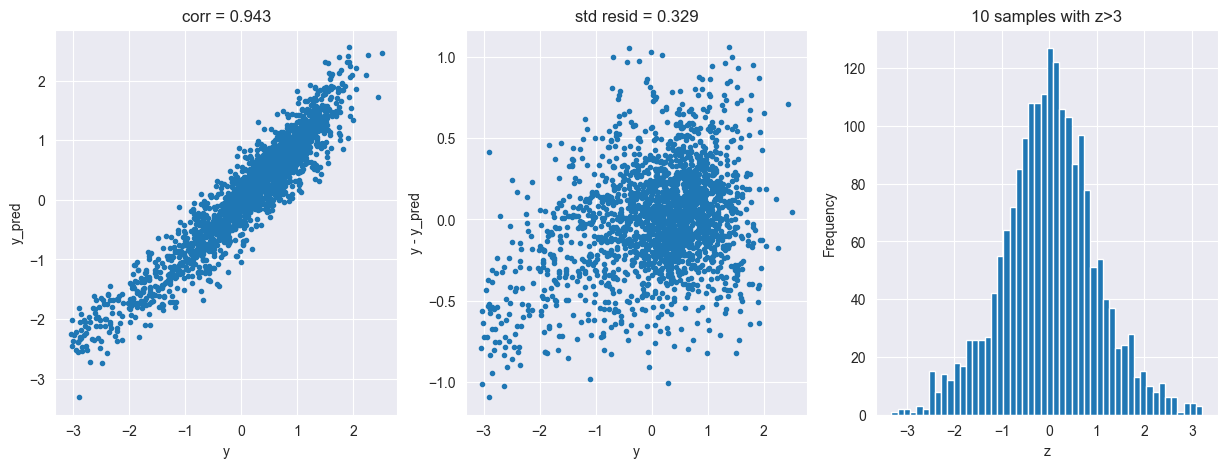

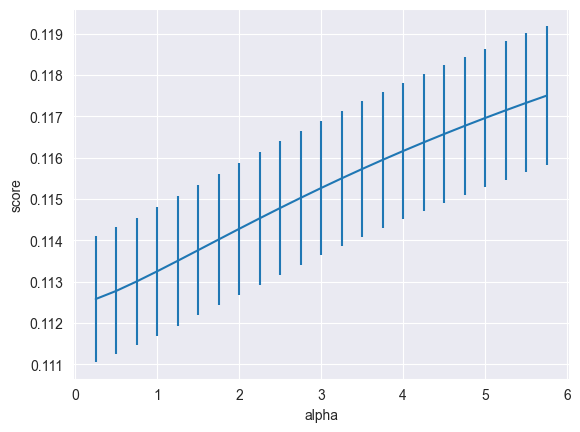

In [21]:
# 使用岭回归模型对数据进行预测，采用 RMSE，MSE 等指标对模型性能进行评价
model = 'Ridge'
opt_models[model] = Ridge()
alph_range = np.arange(0.25, 6, 0.25)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model],
                                                        param_grid=param_grid,
                                                        splits=splits,
                                                        repeats=repeats)

# print("11111", opt_models[model], "22222", cv_score, "33333", grid_results)
cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range,
             abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score']) / np.sqrt(splits * repeats))
plt.xlabel('alpha')
plt.ylabel('score')

In [22]:
# 预测函数
def model_predict(test_data, test_y=[]):
    i = 0
    y_predict_total = np.zeros((test_data.shape[0],))
    for model in opt_models.keys():
        if model != "LinearSVR" and model != "KNeighbors":
            y_predict = opt_models[model].predict(test_data)
            y_predict_total += y_predict
            i += 1
        if len(test_y) > 0:
            print("{}_mse:".format(model), mean_squared_error(y_predict, test_y))
    y_predict_mean = np.round(y_predict_total / i, 6)
    if len(test_y) > 0:
        print("mean_mse:", mean_squared_error(y_predict_mean, test_y))
    else:
        y_predict_mean = pd.Series(y_predict_mean)
        return y_predict_mean

# 模型的预测及结果保存
y_ = model_predict(test_data_process)
y_.to_csv('predict.txt', header=None, index=False)